<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('AAPL.csv')

In [26]:

df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-02-27 00:00:00+00:00,174.87,175.00,172.73,173.21,27835389,42.085475,42.116761,41.570447,41.685967,111341556,0.0,1.0
1,AAPL,2019-02-28 00:00:00+00:00,173.15,174.91,172.92,174.32,28215416,41.671527,42.095101,41.616173,41.953108,112861664,0.0,1.0
2,AAPL,2019-03-01 00:00:00+00:00,174.97,175.15,172.89,174.28,25886167,42.109541,42.152861,41.608953,41.943481,103544668,0.0,1.0
3,AAPL,2019-03-04 00:00:00+00:00,175.85,177.75,173.97,175.69,27436203,42.321328,42.778596,41.868874,42.282822,109744812,0.0,1.0
4,AAPL,2019-03-05 00:00:00+00:00,175.53,176.00,174.54,175.94,19737419,42.244315,42.357428,42.006054,42.342988,78949676,0.0,1.0


In [27]:

df1=df.reset_index()['close']

In [28]:
df1

0       174.87
1       173.15
2       174.97
3       175.85
4       175.53
         ...  
1252    182.31
1253    181.56
1254    182.32
1255    184.37
1256    182.52
Name: close, Length: 1257, dtype: float64

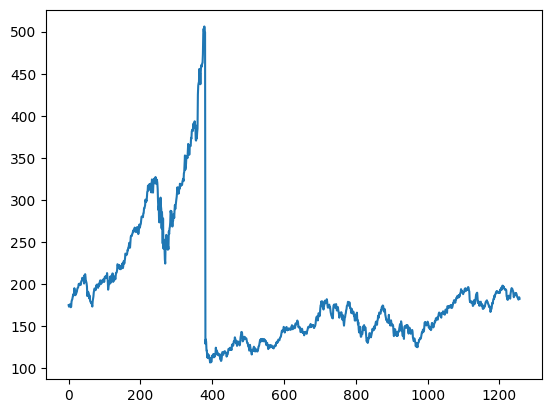

In [29]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [30]:
import numpy as np

In [31]:

df1

0       174.87
1       173.15
2       174.97
3       175.85
4       175.53
         ...  
1252    182.31
1253    181.56
1254    182.32
1255    184.37
1256    182.52
Name: close, Length: 1257, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [35]:

training_size,test_size

(817, 440)

In [36]:
train_data

array([[1.70394490e-01],
       [1.66086412e-01],
       [1.70644959e-01],
       [1.72849092e-01],
       [1.72047589e-01],
       [1.69517846e-01],
       [1.64458359e-01],
       [1.65485285e-01],
       [1.80488416e-01],
       [1.85522855e-01],
       [1.87526612e-01],
       [1.92586099e-01],
       [1.98572323e-01],
       [2.03331246e-01],
       [1.99599249e-01],
       [2.03681904e-01],
       [2.21039449e-01],
       [2.10920476e-01],
       [2.05134627e-01],
       [2.00250470e-01],
       [2.04458359e-01],
       [2.05084534e-01],
       [2.08165310e-01],
       [2.11396368e-01],
       [2.18359424e-01],
       [2.21690670e-01],
       [2.22542267e-01],
       [2.25823419e-01],
       [2.33587977e-01],
       [2.32085160e-01],
       [2.34890420e-01],
       [2.30707577e-01],
       [2.30507201e-01],
       [2.31408892e-01],
       [2.31458986e-01],
       [2.41177207e-01],
       [2.43005636e-01],
       [2.44683782e-01],
       [2.52072636e-01],
       [2.51271133e-01],


In [37]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [40]:

print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 307ms/step - loss: 0.0376 - val_loss: 4.8227e-04
Epoch 2/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0122 - val_loss: 3.9565e-04
Epoch 3/100
12/12 [==============================] - 3s 301ms/step - loss: 0.0099 - val_loss: 2.5764e-04
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0090 - val_loss: 0.0033
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0085 - val_loss: 5.9199e-04
Epoch 6/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0069 - val_loss: 2.5868e-04
Epoch 7/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0063 - val_loss: 8.3192e-04
Epoch 8/100
12/12 [==============================] - 3s 277ms/step - loss: 0.0069 - val_loss: 2.9773e-04
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0052 - val_loss: 2.6975e-04
Epoch 10/100
12/12 [==============================] - 2s 1

In [46]:
import tensorflow as tf

In [47]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 77ms/step


In [48]:


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


219.11299873254214

In [50]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

171.7281282032962

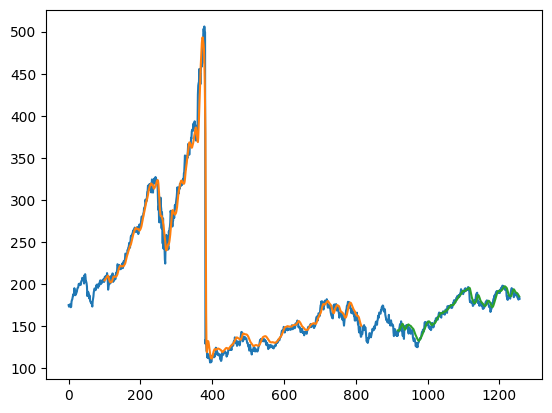

In [51]:

### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [103]:

x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [104]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [105]:

temp_input

[0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.

In [106]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.19457376]
101
1 day input [0.16420789 0.16736381 0.17049468 0.17695679 0.18071384 0.17921102
 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052  0.17282405
 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178 0.15040701
 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717 0.17485285
 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364 0.19526612
 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355
 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259 0.20816531
 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 

In [107]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [100]:
import matplotlib.pyplot as plt

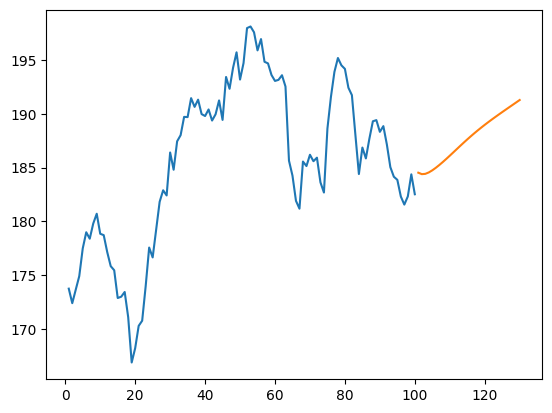

In [110]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

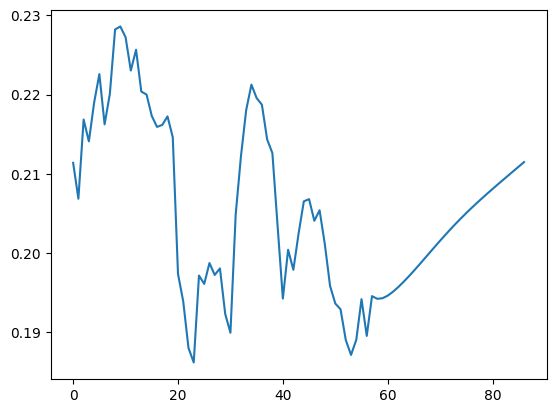

In [111]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [112]:

df3=scaler.inverse_transform(df3).tolist()

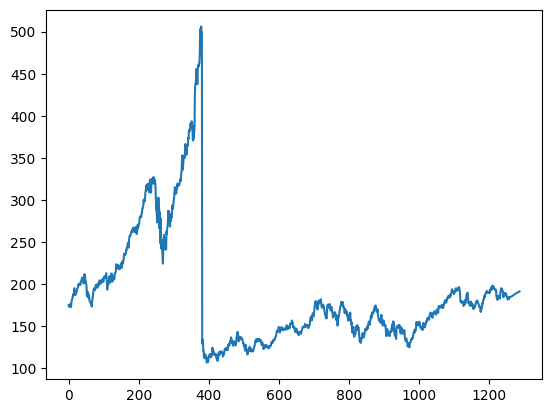

In [113]:

plt.plot(df3)